### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import dataretrieval.nwis as nwis

ModuleNotFoundError: No module named 'dataretrieval'

### USGS Gage ID

In [2]:
site = '12181000'

### Read data from USGS website.  

In [3]:
# get daily values (this is set up to download period of record)
start_date = "1776-07-04"  #can change to any date
now = datetime.now()
date_now = str(now.date())
end_date = date_now        #can change to any date

df = nwis.get_record(sites=site, 
                     service='dv', 
                     start=start_date, 
                     end=end_date,
                     parameterCd = "00060") # Discharge

In [4]:
df

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
1943-09-01 00:00:00+00:00,3200.0,A,12181000
1943-09-02 00:00:00+00:00,3100.0,A,12181000
1943-09-03 00:00:00+00:00,3200.0,A,12181000
1943-09-04 00:00:00+00:00,3000.0,A,12181000
1943-09-05 00:00:00+00:00,2500.0,A,12181000
...,...,...,...
2022-01-23 00:00:00+00:00,9160.0,P,12181000
2022-01-24 00:00:00+00:00,8920.0,P,12181000
2022-01-25 00:00:00+00:00,8780.0,P,12181000


### Define and populate dataframe with probability bins for flow duration curve


In [5]:
df_cdf = pd.DataFrame()
df_cdf['quantiles']= [0.4, 0.7, 0.85, 0.9, 0.94, 0.97, 0.99, 1]
df_bin = df_cdf.diff().rename(columns={"quantiles": "prob"})
df_bin['prob'][0] = df_cdf['quantiles'][0]
df_bin['representative_quantile'] = df_bin['prob'].cumsum()-df_bin['prob']/2
df_FDC = pd.Series(df['00060_Mean'].quantile(df_bin['representative_quantile']))/3.2807**3
df_bin['Qw'] = 0
for i in range(len(df_FDC)):
    df_bin.iloc[i,2] = df_FDC.iloc[i]


Print the data

In [6]:
df_bin

,prob,representative_quantile,Qw
0,0.40,0.200,110.449830
1,0.30,0.550,164.825131
2,0.15,0.775,215.971898
3,0.05,0.875,248.653720
4,0.04,0.920,278.107007
5,0.03,0.955,328.517443
6,0.02,0.980,413.478850
7,0.01,0.995,585.893867


### Create Graph

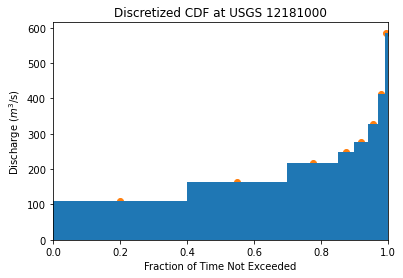

In [7]:
fig, ax1 = plt.subplots(1,1)
ax1.bar(df_bin['representative_quantile'],
              height=df_bin['Qw'], 
              width=df_bin['prob'])
ax1.set_xlabel('Fraction of Time Not Exceeded')
ax1.set_ylabel('Discharge ($m^3$/s)')
ax1.set_xlim([0, 1])
ax1.set_title(f'Discretized CDF at USGS {site}')
ax1.scatter(df_bin['representative_quantile'],df_bin['Qw'
])

### Format text output for use in code

In [8]:
text = 'inputs.Qw = ['
for Q in df_bin['Qw']:
    text = text + f'{Q:.0f},'
text = text + '\b]'    
print(text)

text = 'inputs.p = ['
for p in df_bin['prob']:
    text = text + f'{p:.3f},'
text = text + '\b]'    
print(text)

inputs.Qw = [110,165,216,249,278,329,413,586,]
inputs.p = [0.400,0.300,0.150,0.050,0.040,0.030,0.020,0.010,]
